# Lab 4: Scikit Learn, Classification and Clustering

Deadline Tuesday 11/24/21  11:59 pm 

**scikit-learn** is a popular machine learning package that contains a variety of models and tools. 

All objects within scikitt-learn share a uniform common basic API consisting of 3 interfaces: an _estimator_ interface for building and fitting models, a _predictor_ interface for making predictions, and a _transformer_ interface for converting data.

>The _estimator_  interface defines object mechanism and a fit method for learning a model from training data. All supervised and unsupervised learning algorithms are offered as objects implementing this interface. Other machine learning tasks such as _feature extraction_, _feature selection_, and _dimensionality reduction_ are provided as _estimators_. 

For more information, check the scikit-learn API paper: [https://arxiv.org/pdf/1309.0238v1.pdf]

The general form of using models in scikit-learn:


```
clf = someModel( )
clf.fit(x_train , y_tain)
```

For Example: 

```
clf = LinearSVC( )
clf.fit(x_train , y_tain)
```

>The _predictor_ adds a predict method that takes an array x_test and produces predictions for x_test, based on the learned parameters of the _estimator_. In supervised learning, this method typically return predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as __k-means__, where the predicted values are the cluster labels.

```
clf.predict(x_test)
```

>_transform_ method is used to modify or filter data before feeding it to a learning algorithm. It takes some new data as input and outputs a transformed version of that data. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as _transformers_ within the library. 

This is usually done with __fit_transform__ method. For example: 

```
PCA = RandomizedPCA (n_components = 2) 
x_train = PCA.fit_transform(x_train)
x_test = PCA.fit_transform(x_test)

```

In the example above, we first __fit__ the training set to find the PC components, then they are transformed. 

We can summarize the _estimator_ as follows:

* In _all estimators_
    - `model.fit()` : fit training data. In supervised learning, fit will take two parameters: the data x and labels y. In unsupervised learning, fit will take a single parameter: the data x

* In _supervised estimators_
    - `model.predict()` : predict the label of new test data for the given model. Predict takes one parameter: the new test data and returns the learned label for each item in the test data 
    - `model.score()` : Returns the score method for classification or regression methods.

* In _unsupervised estimators_

    - `model.transform()`: Tranform new data into new basis. Transform takes one parameter: new data and returns a new representation of that data based on the model
  
    

### Classification:  SVM 

Support Vector Machines (SVM) are among the most useful and powerful supervised learning algorithm. Here we are going to look at an example of using SVM models in scikit-learn. Then, it will be your turn to try this model.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

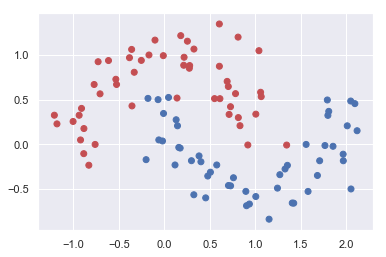

In [3]:
from sklearn.model_selection import train_test_split
# Import make_moons from scikit learn to generate synthetic data
from sklearn.datasets import make_moons


# 2d classification dataset
Xs , ys = make_moons( n_samples = 100,noise = 0.2 , random_state = 0)


# train-test split

Xs_train , Xs_test, ys_train, ys_test = train_test_split(Xs, ys , test_size = 0.15 )

#plot the data
colors = np.array(['r' , 'b'])
plt.scatter(Xs[:,0] , Xs[:,1]  ,c = colors[ys] )
plt.show()


We will perform both linear and nonlinear SVM on this synthetic dataset:

In [4]:
def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy

             precision    recall  f1-score   support

          0       0.67      1.00      0.80         4
          1       1.00      0.82      0.90        11

avg / total       0.91      0.87      0.87        15

[[4 0]
 [2 9]]


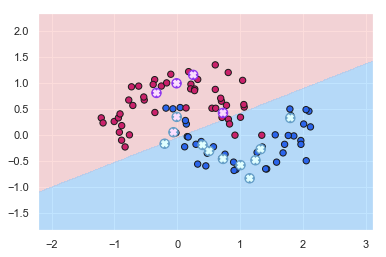

In [5]:
#Import SVM
from sklearn import svm

from matplotlib.colors import ListedColormap
from sklearn import metrics


cmap_light = ListedColormap(['#FBBBB9', '#82CAFF']) 
cmap_bold = ListedColormap(['#CA226B', '#2B65EC']) 
cmap_test = ListedColormap(['#8E35EF', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])

# clf1 is a linear svm classifier
clf1 = svm.SVC(kernel = 'linear')

# Fit data
clf1.fit(Xs_train, ys_train)

# Predict
ys_predict = clf1.predict(Xs_test)


#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict))
print(metrics.confusion_matrix(ys_test, ys_predict))

# Display the svm 
xx , yy = meshGrid(Xs[:,0], Xs[:,1], 0.01)



Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
#plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
    

Now we apply a non-linear svm classifier

             precision    recall  f1-score   support

          0       0.80      1.00      0.89         4
          1       1.00      0.91      0.95        11

avg / total       0.95      0.93      0.94        15

[[ 4  0]
 [ 1 10]]


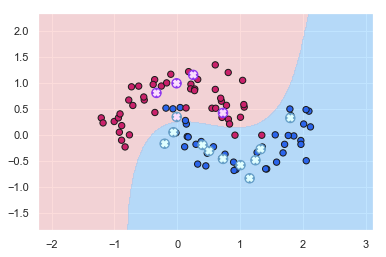

In [6]:
# clf2 is a nonlinear svm classifier

clf2 = svm.SVC(kernel = 'rbf')


# Fit data
clf2.fit(Xs_train, ys_train)

# Predict
ys_predict2 = clf2.predict(Xs_test)



#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict2))
print(metrics.confusion_matrix(ys_test, ys_predict2))

# Display the svm 
xx , yy = meshGrid(Xs[:,0], Xs[:,1], 0.01)



Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
#plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_predict2, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
    

### SVM on Wine quality dataset

#### Exercise 4.1 (30 pts)

Now it's your turn to work with SVM. The wine data set is loaded below. You can learn more about the dataset by using `datasett.DESCR`. Here, you need to work with the first two features to train your model.

* Select the first two features for your X
* Split the dataset in two sets of training and testing data. Use 80% of the data for training and 20% for testing
* Perform linear and non-linear SVM on the dataset 
* Display the classification report and accuracy for both models

In [8]:
from sklearn.datasets import load_wine

Xwine_full , ywine = load_wine(return_X_y = True)

#Your code here






#### Exercise 4.2 (10 pts)

Scaling features is another step that can affect the performance of your classifier. For the wine data, scale the features using `StandardScaler` and perform linear SVM.  Display the classification report and accuracy. 
Did scaling data affect the classifier performance?

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


#Your code here






#### Exercise 4.3 (10 pts)

scikit-learn has many other classifiers. Pick another classifier of your choice ( KNN, DecisionTree, NaiveBayes, ...) and apply it to the wine dataset. Display the classification report and accuracy.

In [ ]:
#Your code goes here




### Clustering

You have already seen an example of clustering using scikit-learn in lecture. In this section, you will apply `KMeans` algorithm to the wine dataset.

#### Exercise 4.4 ( 30 pts)
* First choose the first two features and apply kmeans clustering.
* Display cluster evaluation metrics`homogeneity_score` and `completeness_score` (both belong to sklearn.metrics)
* Plot the clusters and centroids. You have the "ground truth" or labels of your data points, your plot should create a meshgrid to display the decision boundary of your model, and add the datapoints and their true labels. ( This is to observe how good your model performs on the data)

Note: For displaying decision boundaries and data points follow these steps:

1. Use meshGrid function to get the mesh for your attributes
2. Obtain labels for each point in mesh and reshape it. ( Z = kmeans.predict(....))
3. Put the results into a color plot
    * Plot the colormesh --> plt.pcolormesh
    * Plot your data points --> plt.scatter
    * Plot the centroids --> plt.scatter
    * Set titles, x and y ranges
    * plt.show()

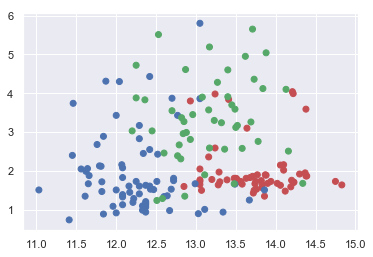

In [9]:
from sklearn.cluster import KMeans

Xwine_full , ywine = load_wine(return_X_y = True)

Xc = Xwine_full [:, :2]

colormap = np.array(['r' , 'b' , 'g'])
plt.scatter(Xc[:,0],Xc[:,1] , c = colormap[ywine])
plt.show()



In [ ]:
# Your code here


#### Exercise 4.5 (20 pts)

In the previous model you used the first two features: 'Alcohol' and 'Malic acid'. 
For this exercise, pick features 'Alcohol' and 'OD280/OD315 of diluted wines' (feature #1 and feature #12) as your
two attributes and perform the tasks in Exercise 4.4. (cluster, report metrics, draw decision boundaries)

Which model performs better?

In [ ]:
# your code here